In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import math

from time import sleep


In [35]:
pytrends = TrendReq(hl='es-MX', tz=360)

kw_list = ["Narcotráfico", "Cártel", "Banda"]

region_codes = ["MX-JAL", "MX-SIN", "MX-MIC", "MX-GRO", "MX-TAM", "MX-CHH"]

all_data = pd.DataFrame()


In [36]:
for index, region_code in enumerate(region_codes):
    try:
        pytrends.build_payload(
            kw_list=kw_list,
            cat=0,
            timeframe='today 5-y',
            geo=region_code,
            gprop=''
        )
        iot = pytrends.interest_over_time()
        
        if 'isPartial' in iot.columns:
            iot.drop(columns='isPartial', inplace=True)
        
        rename_dict = {}
        for kw in kw_list:
            rename_dict[kw] = f"{kw} ({region_code})"
        iot.rename(columns=rename_dict, inplace=True)
        
        if all_data.empty:
            all_data = iot.copy()
        else:
            all_data = all_data.join(iot, how='outer')

        print(f'{index + 1} ({region_code}) from {len(region_codes)}')

        sleep(5)
    except Exception as e:
        print(f'Could not get for {region_code}: {e}')

/Users/denis/Desktop/masters_thresis/thesis_venv/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


1 (MX-JAL) from 6


/Users/denis/Desktop/masters_thresis/thesis_venv/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


2 (MX-SIN) from 6


/Users/denis/Desktop/masters_thresis/thesis_venv/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


3 (MX-MIC) from 6


/Users/denis/Desktop/masters_thresis/thesis_venv/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


4 (MX-GRO) from 6
Could not get for MX-TAM: The request failed: Google returned a response with code 429
Could not get for MX-CHH: The request failed: Google returned a response with code 429


In [37]:
monthly_data = all_data.resample('M').mean()

/var/folders/_k/4jmlcdh94fn8f_g2j15scs2m0000gn/T/ipykernel_77034/2122568981.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = all_data.resample('M').mean()


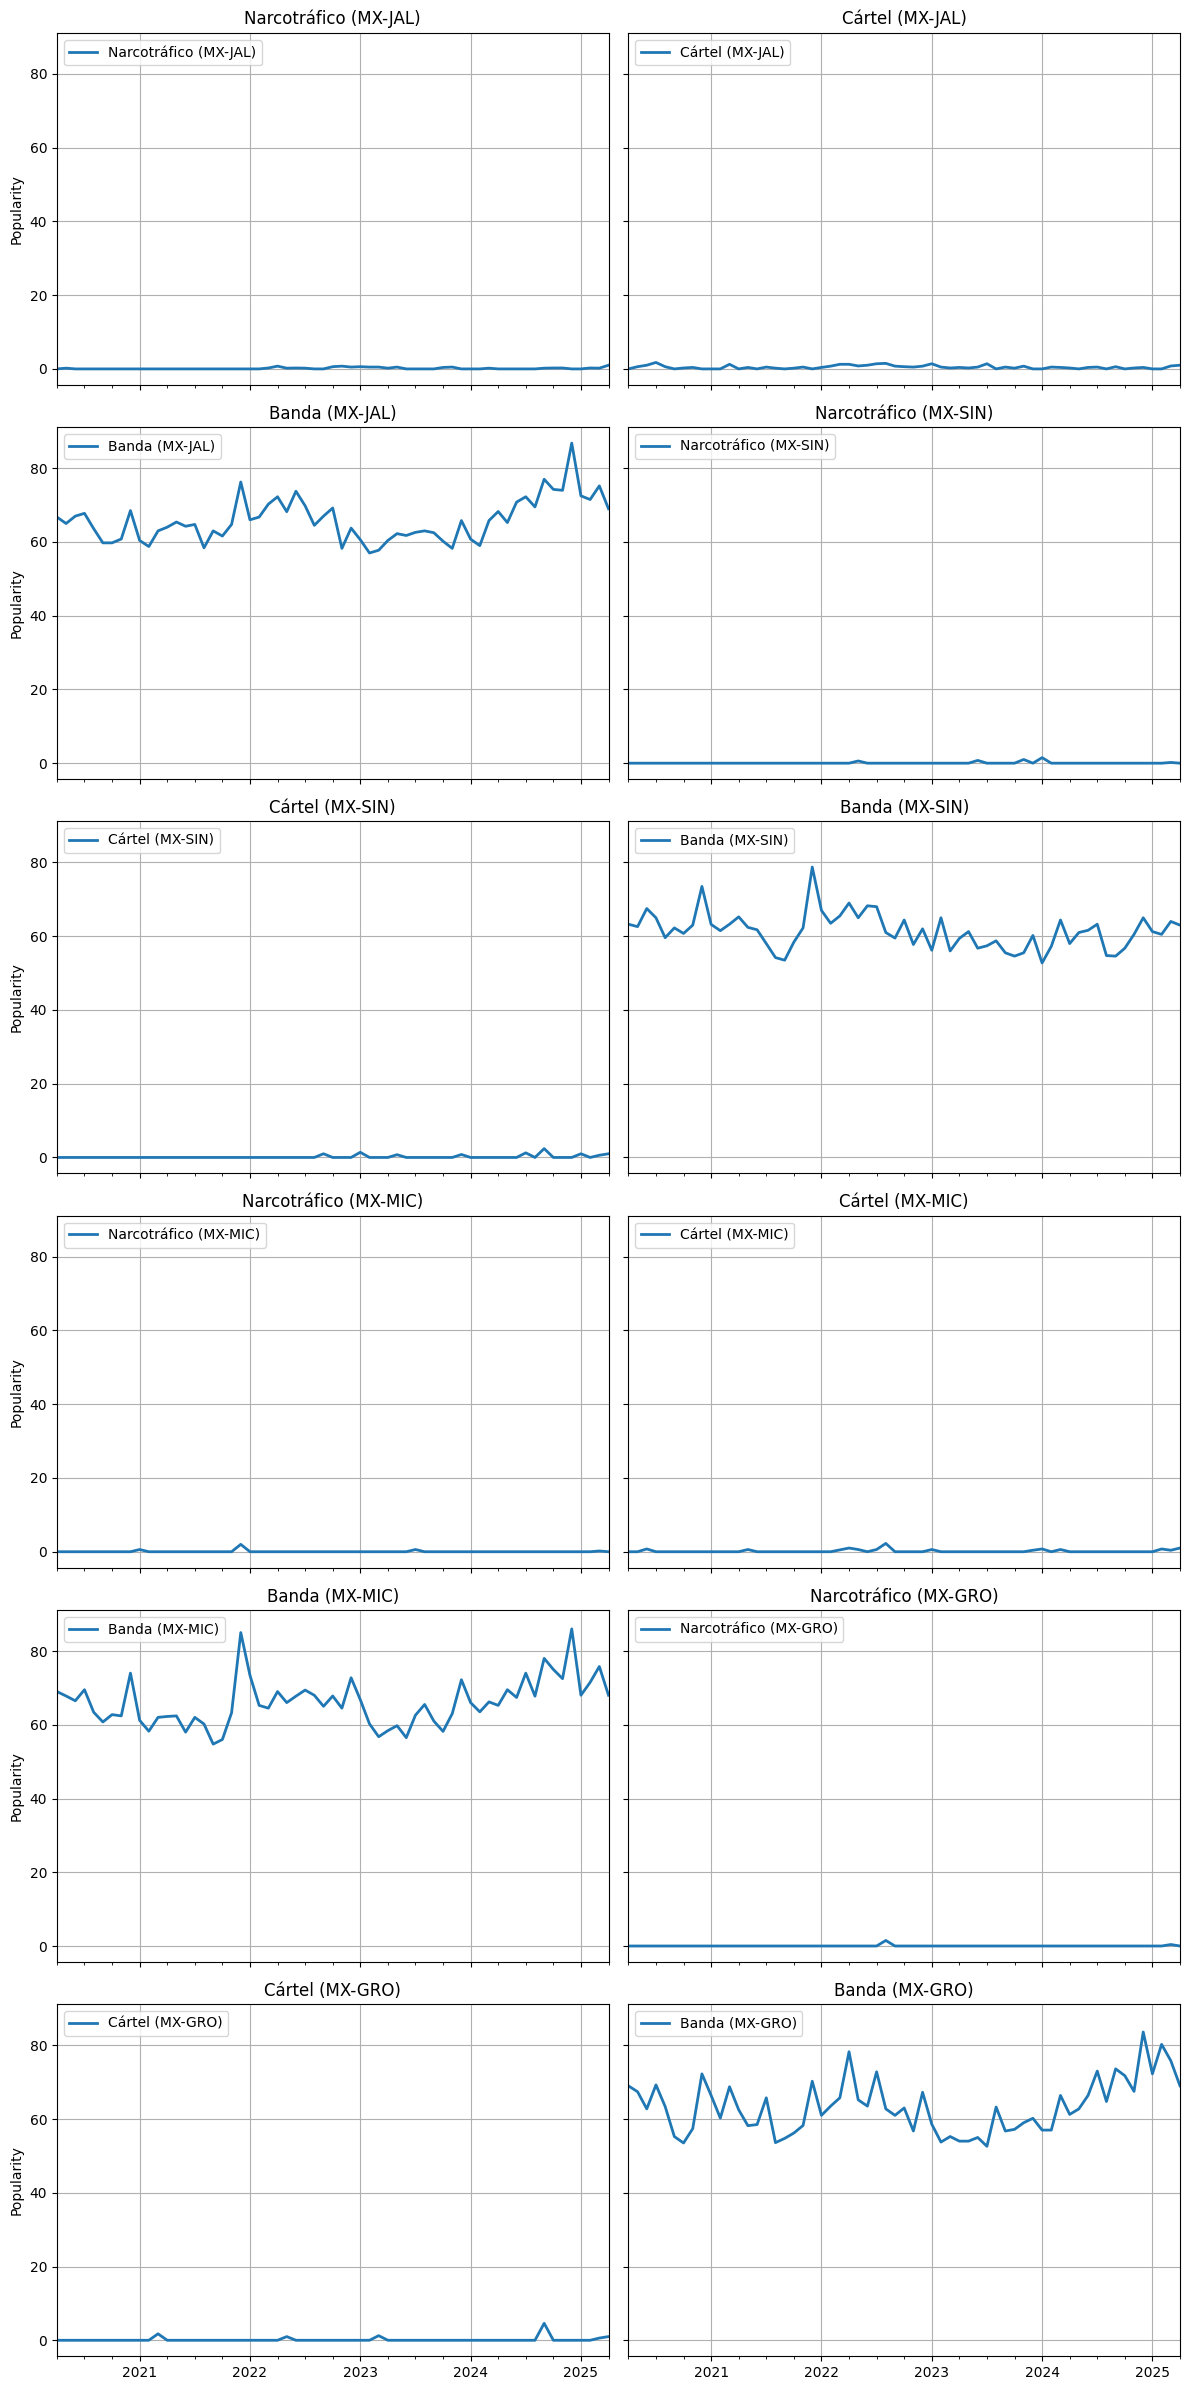

In [38]:
columns = monthly_data.columns  
n_cols = len(columns)
n_rows = math.ceil(n_cols / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4*n_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, col in enumerate(columns):
    monthly_data[col].plot(ax=axes[i], label=col, linewidth=2)
    axes[i].legend(loc='upper left')
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Popularity")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

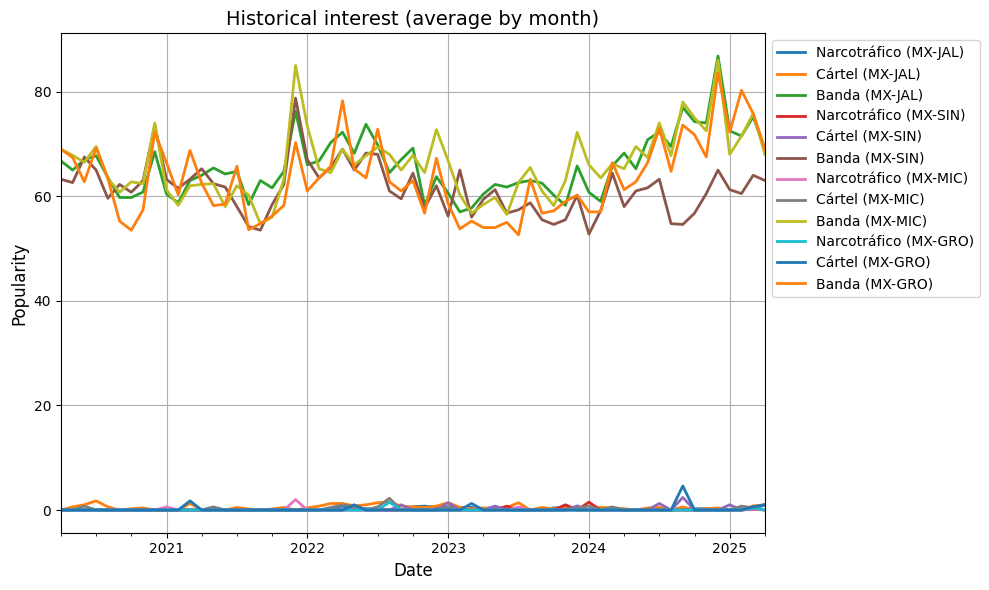

In [39]:
plt.figure(figsize=(10, 6))
monthly_data.plot(ax=plt.gca(), linewidth=2)
plt.title("Historical interest (average by month)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Popularity", fontsize=12)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

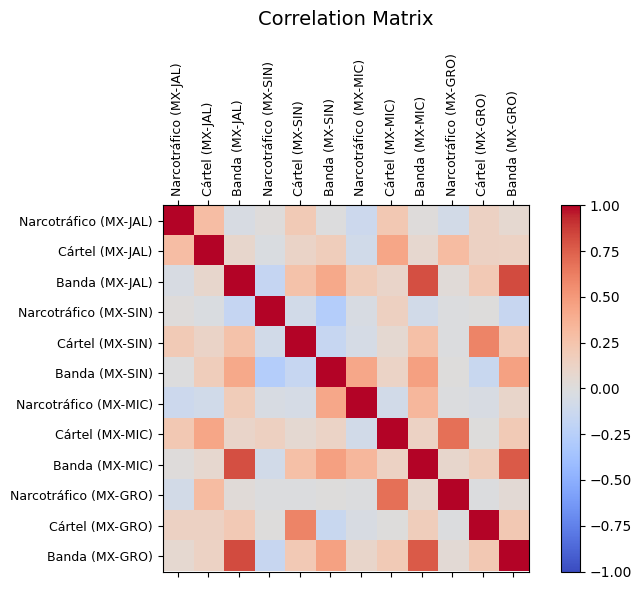

In [40]:
corr_matrix = monthly_data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = range(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90, fontsize=9)
ax.set_yticklabels(corr_matrix.columns, fontsize=9)
ax.set_title("Correlation Matrix", pad=20, fontsize=14)
plt.tight_layout()
plt.show()

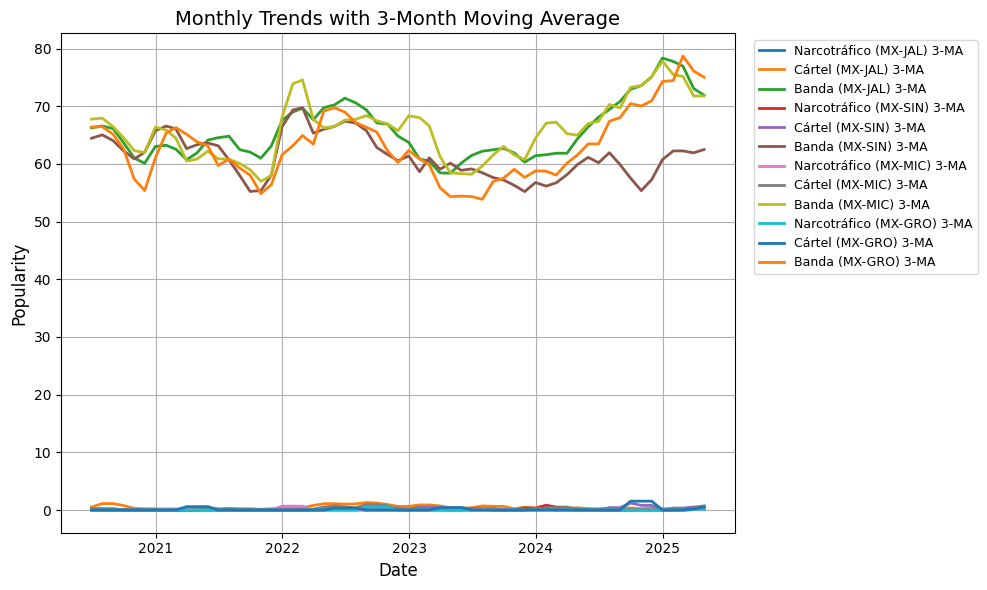

In [41]:
rolling_data = monthly_data.rolling(window=3).mean()
plt.figure(figsize=(10, 6))
for col in monthly_data.columns:
    plt.plot(rolling_data.index, rolling_data[col], linewidth=2, label=f"{col} 3-MA")
plt.title("Monthly Trends with 3-Month Moving Average", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

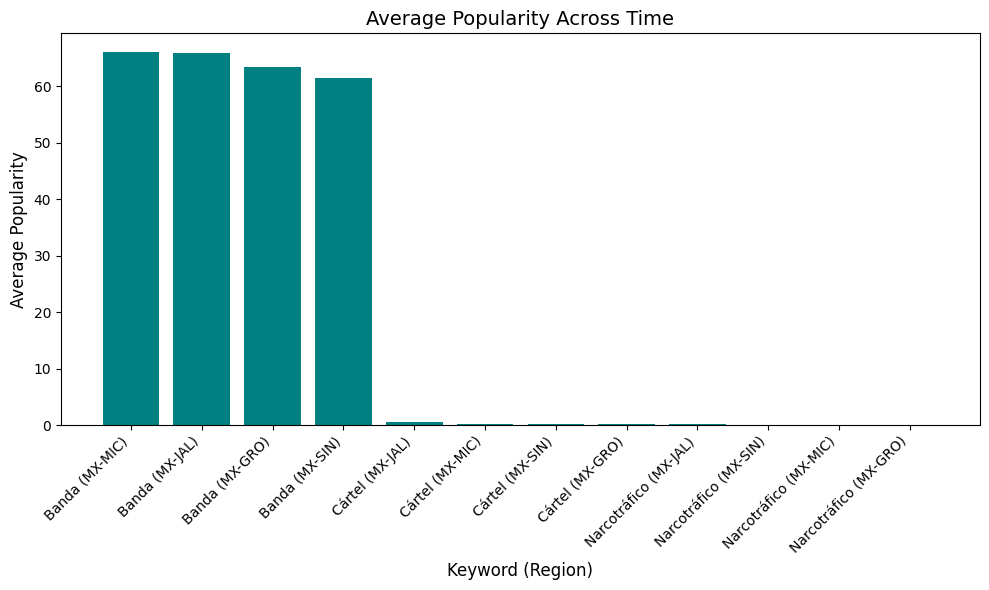

In [42]:
mean_popularity = monthly_data.mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(mean_popularity.index, mean_popularity.values, color='teal')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Average Popularity Across Time", fontsize=14)
plt.xlabel("Keyword (Region)", fontsize=12)
plt.ylabel("Average Popularity", fontsize=12)
plt.tight_layout()
plt.show()